In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
ls =['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 ]
for i in ls:
    print(i,dataset[i].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')

In [8]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace({" ":"0.0"})

In [9]:
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')

In [10]:
dataset.drop(columns = 'customerID',inplace = True)

In [11]:
object_cols = dataset.select_dtypes(include = 'object').columns.tolist()

In [12]:
dataset['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
dataset['Churn']=dataset['Churn'].replace({'No':0,'Yes':1})

C:\Users\dell\AppData\Local\Temp\ipykernel_11536\1604017191.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Churn']=dataset['Churn'].replace({'No':0,'Yes':1})


In [14]:
dataset['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [15]:
encoders = {}
for column in ls:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    encoders[column]=le
with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [16]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [17]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [18]:
dataset.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


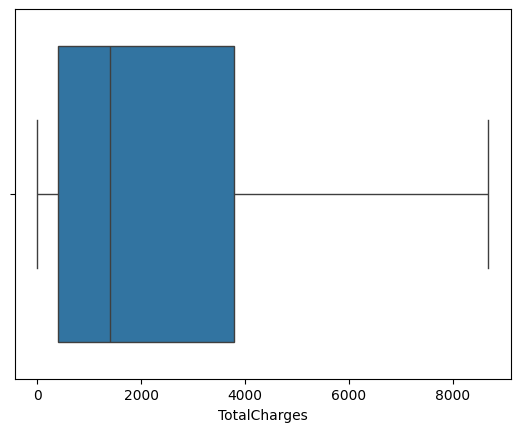

In [19]:
sns.boxplot(x='TotalCharges',data = dataset)
plt.show()

In [20]:
min_range = dataset['MonthlyCharges'].mean() - 3*(dataset['MonthlyCharges'].std())
max_range = dataset['MonthlyCharges'].mean() +  3*(dataset['MonthlyCharges'].std())

In [21]:
max_range

np.float64(155.03183375363466)

In [22]:
x = dataset.iloc[:,:-1]
y = dataset['Churn']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [24]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [25]:
smote = SMOTE(random_state = 42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [26]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [27]:
models = {
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [28]:
cv_scores = {}
for model_name , model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring='accuracy')
    cv_scores[model_name]=scores
    print(f'{model_name} cross_validation_accuracy : {np.mean(scores):.2f}')
    print('-'*70)


Training Decision Tree with default parameters
Decision Tree cross_validation_accuracy : 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross_validation_accuracy : 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross_validation_accuracy : 0.83
----------------------------------------------------------------------


In [29]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71601208, 0.81993958, 0.83564955, 0.83746224]),
 'Random Forest': array([0.72826087, 0.7734139 , 0.90332326, 0.89969789, 0.8978852 ]),
 'XGBoost': array([0.71135266, 0.74864048, 0.91178248, 0.88640483, 0.91117825])}

In [30]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [31]:
rf.score(x_train_smote,y_train_smote)*100, rf.score(x_test,y_test)*100

(99.89125181246979, 77.71469127040454)

In [32]:
y_pred = rf.predict(x_test)

In [33]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred)*100)
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score :  77.71469127040454
Confusion Matrix :  [[879 157]
 [157 216]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [34]:
model_data = {"model":rf ,'feature_names':x.columns.tolist()}
with open('customer_churn_model.pkl','wb') as f:
    pickle.dump(model_data,f)

In [35]:
with open('customer_churn_model.pkl','rb') as f:
    model_data = pickle.load(f)

loaded_model = model_data['model']
feature_names = model_data['feature_names']

In [36]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [37]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [38]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [39]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data = pd.DataFrame([input_data])


In [40]:
with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data[column] = encoder.transform(input_data[column])
   
# make a prediction
prediction = loaded_model.predict(input_data)
pred_prob = loaded_model.predict_proba(input_data)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.79 0.21]]


In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}


In [50]:
rf = RandomForestClassifier(random_state=42,
 n_estimators=100,
 min_samples_split=10,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=5,
 criterion='entropy',
 class_weight=None,
 bootstrap= True)
rf.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [51]:
rf.score(x_train_smote,y_train_smote)*100 , rf.score(x_test,y_test)*100  

(81.41614306428227, 77.00496806245565)

In [44]:
rcv = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [45]:
rcv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=3,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [42]},
                   random_state=42, verbose=2)

In [46]:
rcv.best_params_

{'random_state': 42,
 'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None,
 'bootstrap': True}

In [47]:
rcv.best_score_

np.float64(0.8393066684180568)